In [96]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [97]:
#load the dataset
df = pd.read_csv("heart.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
df["chol"].unique()  #to check unique values

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [117]:
#remove unwanted columns
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,145,233,1,0,150,0,2.3,1,0,1,1
1,37,1,3,130,250,0,1,187,0,3.5,1,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,3,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,3,0,2,1
4,57,0,1,120,354,0,1,163,1,0.6,3,0,2,1


In [121]:
#renaming the columns
d = {"cp":"chest_pain_type","trestbps":"resting_bp","chol":"cholestoral","fbs":"fasting_blood_sugar","thalach":"max_heart_rate","exang":"exercise_induced_angina","ca":"num_major_vessels"}
df.rename(columns=d,inplace=True)
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,target
0,63,1,4,145,233,1,0,150,0,2.3,1,0,1,1
1,37,1,3,130,250,0,1,187,0,3.5,1,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,3,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,3,0,2,1
4,57,0,1,120,354,0,1,163,1,0.6,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,1,140,241,0,1,123,1,0.2,2,0,3,0
299,45,1,4,110,264,0,1,132,0,1.2,2,0,3,0
300,68,1,1,144,193,1,1,141,0,3.4,2,2,3,0
301,57,1,1,130,131,0,1,115,1,1.2,2,1,3,0


<Axes: xlabel='target', ylabel='count'>

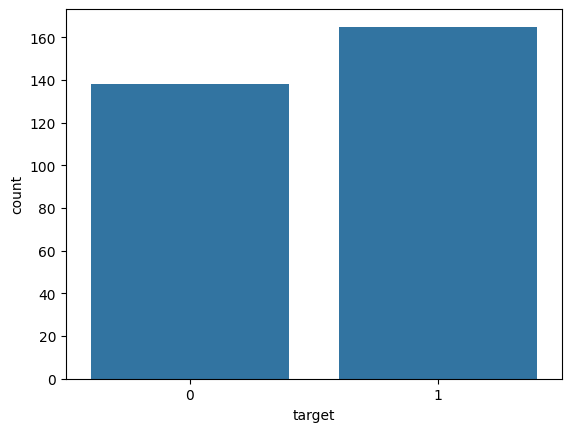

In [122]:
sns.countplot(x="target",data=df)

Data is balanced

<Axes: xlabel='age', ylabel='Count'>

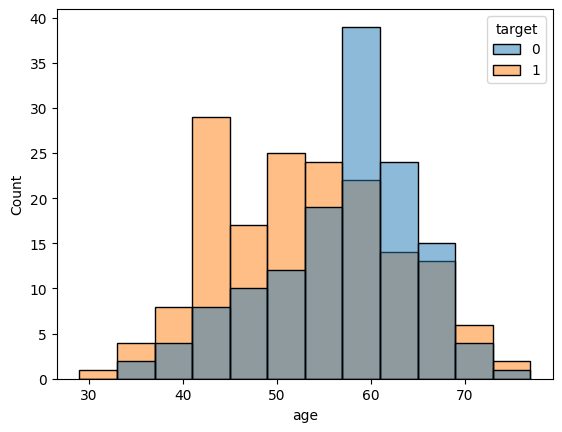

In [124]:
sns.histplot(x="age",data=df,hue="target")

Model training

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [125]:
#divide into training and testing
X=df.drop("target",axis=1)
y=df.target

In [129]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#model selection
#we did just to select the model
models = [LogisticRegression(),SVC(kernel="linear"),RandomForestClassifier(n_estimators=100,max_depth=5)]

for m in models:
    model = m
    model.fit(Xtrain,ytrain)
    print(f"Model:{m}")
    print("Training eff:",model.score(Xtrain,ytrain))
    print("Testing eff:",model.score(Xtest,ytest))


c:\Users\UJITHA\OneDrive\Desktop\Heart_disease_predictor\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:LogisticRegression()
Training eff: 0.8679245283018868
Testing eff: 0.8131868131868132
Model:SVC(kernel='linear')
Training eff: 0.8820754716981132
Testing eff: 0.8131868131868132
Model:RandomForestClassifier(max_depth=5)
Training eff: 0.9622641509433962
Testing eff: 0.8351648351648352


In [132]:
#modle training
model = LogisticRegression()
model.fit(Xtrain,ytrain)

c:\Users\UJITHA\OneDrive\Desktop\Heart_disease_predictor\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [133]:
print("Training eff:",model.score(Xtrain,ytrain))
print("Testing eff:",model.score(Xtest,ytest))

Training eff: 0.8679245283018868
Testing eff: 0.8131868131868132


In [134]:
ypred =model.predict(Xtest)
ypred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [135]:
confusion_matrix(ytest,ypred)

array([[32,  9],
       [ 8, 42]])

In [136]:
print("Accuracy:",accuracy_score(ytest,ypred))
print("Recall:",recall_score(ytest,ypred))


Accuracy: 0.8131868131868132
Recall: 0.84


In [138]:
df.to_csv("cleaned_data.csv")

In [139]:
import pickle
with open("Log_model.pkl","wb") as file:
    pickle.dump(model,file)

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'num_major_vessels',
       'thal', 'target'],
      dtype='object')